# Various plot for Visualization

### Quantitative:

1. Kernel Density plot
2. Histogram
3. Box plot 


### Categorical: 

1. Pie chart

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import the dataset 

In [2]:
df=pd.read_csv("E:\DATA SCIENCE\data sets\heart.csv")

### 1.3 How to see the size of your data? 

In [3]:
df.shape

(303, 14)

### 1.4 How to view the statistical characteristics of the data?  

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5  a How to see just one column?

In [5]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


### 1.5 b How to check the column names? 

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.5 c Find the Numerical Features,Categorical Features, Alphanumeric Features? 

In [7]:
num=['age','trestbps','chol','thalach','ca','target','oldpeak']
cat=['sex','cp','fbs','restecg','exang','slope','thal']
alpha=[]

#### Change the column names?

In [8]:
#Change the sex(0,1)=(female,male)
sex1=df['sex'].replace((0,1),('female','male'))

## 1.6 Quantitative:  

### 1.6 a) Create kdeplot for showing age

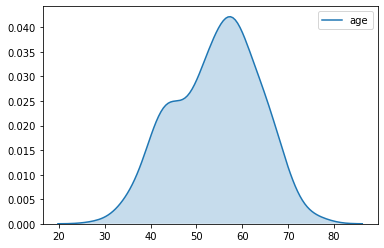

In [9]:
sns.kdeplot(df['age'],shade=True)
plt.show()

### 1.6 b) Create histogram for showing cholestrol with Number of bins 5

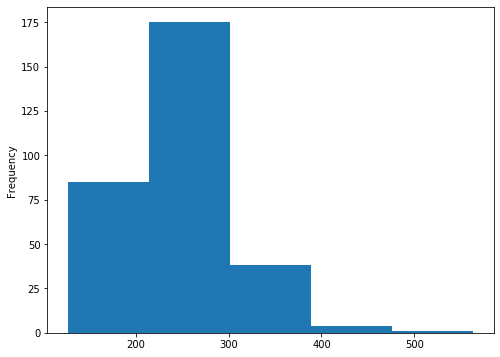

In [10]:
df['chol'].plot(kind='hist',bins=5,figsize=(8,6))
plt.show()

### 1.6 c) Create Boxplot for showing trestbps and comment what the dark spot indicate

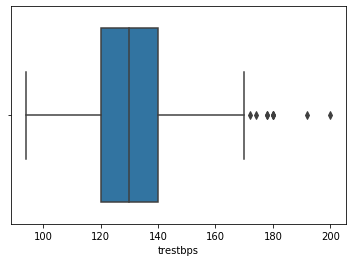

In [11]:
sns.boxplot(df['trestbps'])

##### the boxplot shows till around the value '170', after that the values above '170' are "outliers",so they are shown as dark spots .

##  Categorical vs. Quantitative  

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

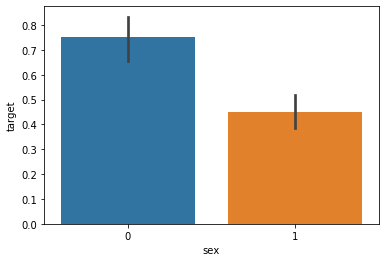

In [12]:

#draw a bar plot of target by sex
sns.barplot(df['sex'],df['target'])
plt.show()

In [13]:
#print percentages of females vs. males Heart Disease
(sex1.value_counts()/sex1.count())*100

male      68.316832
female    31.683168
Name: sex, dtype: float64

### Observation:



### 1.8b) Create Bar plot for checking the both target vs Sex.

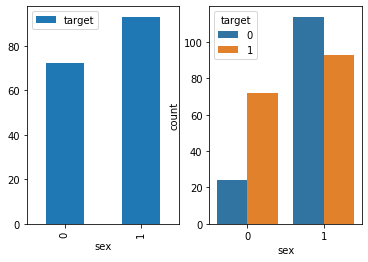

In [14]:
#create a subplot
fig,axes=plt.subplots(nrows=1, ncols=2)

# create bar plot using groupby
df.groupby(by=['sex']).aggregate({'target':'sum'}).plot(kind='bar',ax=axes[0])

# create count plot
sns.countplot(df['sex'],hue=df['target'])
plt.show()

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not

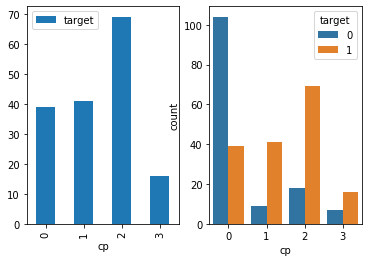

In [15]:
# create subplot plot
fig,axes=plt.subplots(nrows=1, ncols=2)
# create bar plot using groupby
df.groupby(by=['cp']).aggregate({'target':'sum'}).plot(kind='bar',ax=axes[0])

# create count plot
sns.countplot(df['cp'],hue=df['target'])
plt.show()

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'

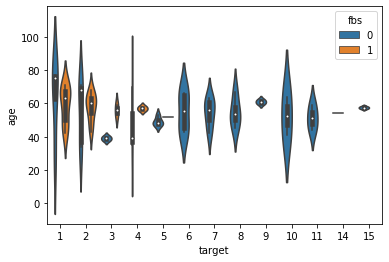

In [16]:
# create subplot plot
fig,axes=plt.subplots(nrows=1, ncols=1)

# create violinplot plot using groupby

temp=df.groupby(by=['fbs','age']).agg({'target':'count'}).reset_index()
sns.violinplot(x="target", y="age", hue='fbs',data=temp,ax=axes)
plt.show()

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age 

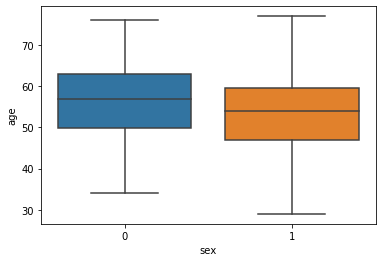

In [17]:
# create boxplot
sns.boxplot('sex','age',data=df)
plt.show()

# 1.9 Categorical vs. Categorical 
* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex

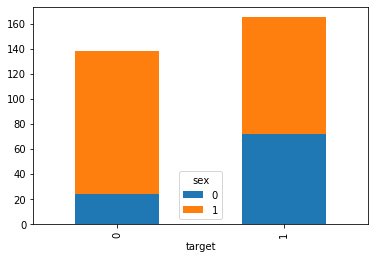

In [18]:
#create crosstab
pd.crosstab(df["target"],df["sex"]).plot.bar(stacked=True)           
plt.show()

# 1.10 Quantitative vs. Quantitative 

### 1.10a) Create a scatter plot for showing age & st_depression

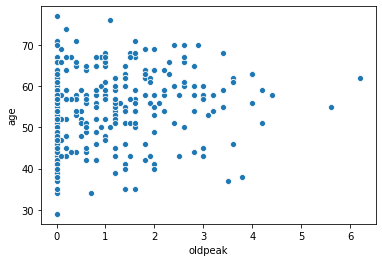

In [19]:
sns.scatterplot('oldpeak','age',data=df)
plt.show()

# Overall  Observation  
   

1. In between the range of 230 to 300 the cholestrol is about 175.
2. Therr is no linear relation between age and oldpeak.
3. The number of females are less as compare to male.
4. The females age is in between 50 to 53(around), whereas the Male age is in between 48 to 58(around).
5. Violin plots have many of the same summary statistics as box plots:
    The white dot represents the median
    The thick gray bar in the center represents the interquartile range
    The thin gray line represents the rest of the distribution,
    except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
6. The female are around 75% and the make are around 42%.

# THE END